In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
plt.rcParams.update({'font.size': 14})
plt.rc('axes', axisbelow=True)

from transformers import AutoModel, AutoModelForCausalLM

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Define the base 'Blues' colormap
base_cmap = plt.get_cmap('Blues')

# Create a new colormap that keeps the light colors and transitions to darker navy blue
navy_colors = [
    (0.968627, 0.984314, 1.000000), # Light color from 'Blues' (almost white)
    (0.870588, 0.921569, 0.968627), 
    (0.776471, 0.858824, 0.937255),
    (0.619608, 0.792157, 0.882353),
    (0.419608, 0.682353, 0.839216),
    (0.258824, 0.572549, 0.776471),
    (0.129412, 0.443137, 0.709804),
    (0.031373, 0.317647, 0.611765),
    (0, 0, 0.501960),  # Darker navy blue
    (0, 0, 0.4),       # Even darker navy blue
    (0, 0, 0.3)        # Darkest navy blue
]
navy_cmap = LinearSegmentedColormap.from_list('NavyBlues', navy_colors)

In [3]:
'BERT tiny (l = 2, d = 128, h = 2 ; 4.40M parameters)'
dh = 64
l = 2
d = 128
h = d // dh

model = AutoModel.from_pretrained("google/bert_uncased_L-2_H-128_A-2")

In [4]:
layer = 1

Wq = model.encoder.layer[layer].attention.self.query.weight.T.detach().numpy()
Wk = model.encoder.layer[layer].attention.self.key.weight.T.detach().numpy()
M = Wq @ Wk.T

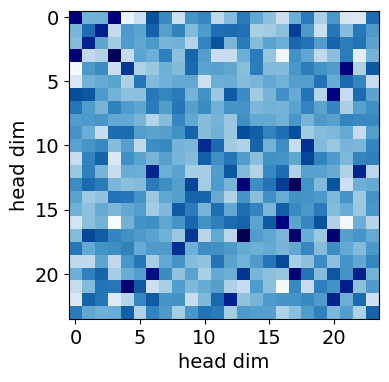

In [5]:
plt.figure(figsize=(4,4))
part = 24

plt.imshow(M[ part: 2 *part, part: 2 *part], aspect = 'auto', cmap = navy_cmap)

plt.ylabel('head dim')
plt.xlabel('head dim')
# plt.xticks([0, 63], [1, 64])
# plt.yticks([0, 63], [64, 1])

plt.savefig('../figures/fig-example-M-language-model-encoder-only.pdf', format='pdf', dpi=300)

In [6]:
'TinyGPT 3m (l = 8, d = 64, h = 2 ; 3M parameters)'
dh = 64
l = 8
d = 128
h = d // dh

model = AutoModelForCausalLM.from_pretrained("roneneldan/TinyStories-3M")

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
layer = 1

Wq = model.transformer.h[layer].attn.attention.q_proj.weight.T.detach().numpy()
Wk = model.transformer.h[layer].attn.attention.k_proj.weight.T.detach().numpy()

M = Wq @ Wk.T

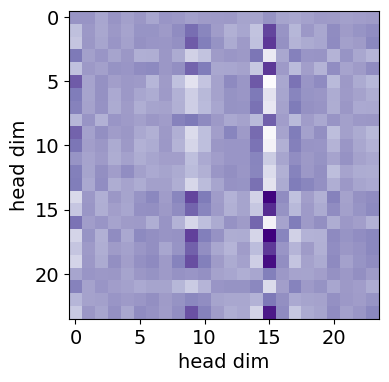

In [8]:
plt.figure(figsize=(4,4))

part = 24

plt.imshow(M[ part: 2 *part, part: 2 *part], aspect = 'auto', cmap = 'Purples')

plt.ylabel('head dim')
plt.xlabel('head dim')
# plt.xticks([0, 63], [1, 64])
# plt.yticks([0, 63], [64, 1])

plt.savefig('../figures/fig-example-M-language-model-decoder-only.pdf', format='pdf', dpi=300)